# Task 3: CAR PRICE PREDICTION WITH MACHINE LEARNING

## Introduction

The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learning.

The automobile industry, with its diverse array of brands, features, and specifications, has captivated consumers worldwide. One crucial aspect influencing a car's market value is its selling price. Predicting car prices has become a focal point in machine learning research due to its significance for both consumers and industry professionals. Various factors such as brand reputation, car features, horsepower, and mileage contribute to the complex dynamics of car pricing. This project aims to delve into the realm of machine learning to develop a predictive model for car prices. By leveraging advanced algorithms and data analysis, this project seeks to unravel the intricate relationships between different car attributes and their impact on pricing. As we navigate through the intricacies of this task, we'll gain insights into the machine learning techniques essential for predicting car prices accurately.

In [69]:
import pandas as pd
import numpy as np

In [70]:
data = pd.read_csv('car data.csv')     #Reads the Cars Dataset

### Data Analysis

In [71]:
data.head()                            #Displays Cars Information upto 4 entries

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [72]:
data.info()         #Displays Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


### Data Exploration

In [73]:
data.shape   #Define shape of Dataset

(301, 9)

In [74]:
data.isnull().sum()  #Check the number of missing values in each column

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [75]:
data.columns   #Define Columns in Dataset

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [76]:
data.tail(6)   #Gives Information for Last 6 entries

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
295,city,2015,8.55,13.09,60076,Diesel,Dealer,Manual,0
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.90,5464,Petrol,Dealer,Manual,0


In [77]:
data.describe()   #Describes the dataset

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [78]:
data.isnull()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False


### Data Visualization

In [79]:
import seaborn as sb
import matplotlib.pyplot as plt


### Histogram

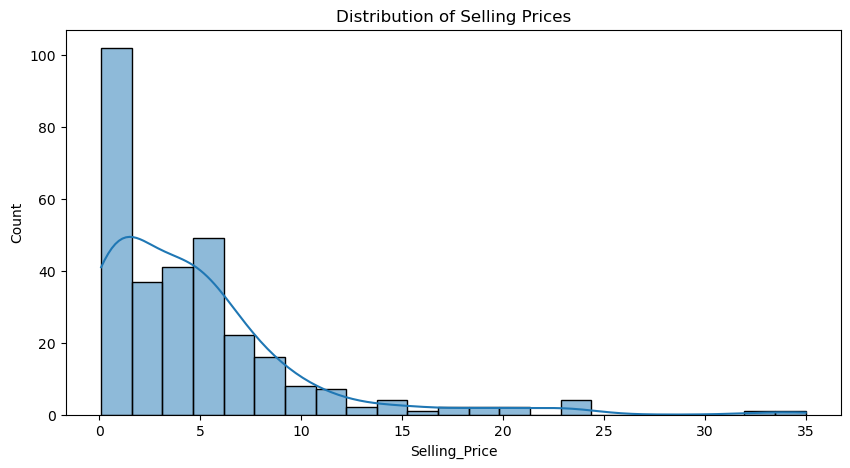

In [80]:
fig, axes = plt.subplots(figsize=(10, 5))                          #Hist Plots
sb.histplot(data['Selling_Price'], kde=True, ax=axes)
axes.set_title('Distribution of Selling Prices')
plt.show()

### Correlation Heatmap

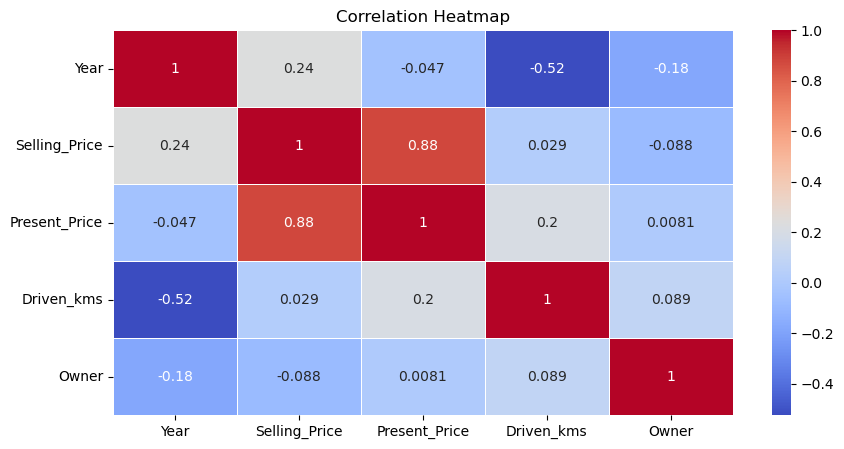

In [81]:
correlation_matrix = data.corr(numeric_only=True)                          #Correlation Matrix
plt.figure(figsize=(10, 5))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

### Pairplot

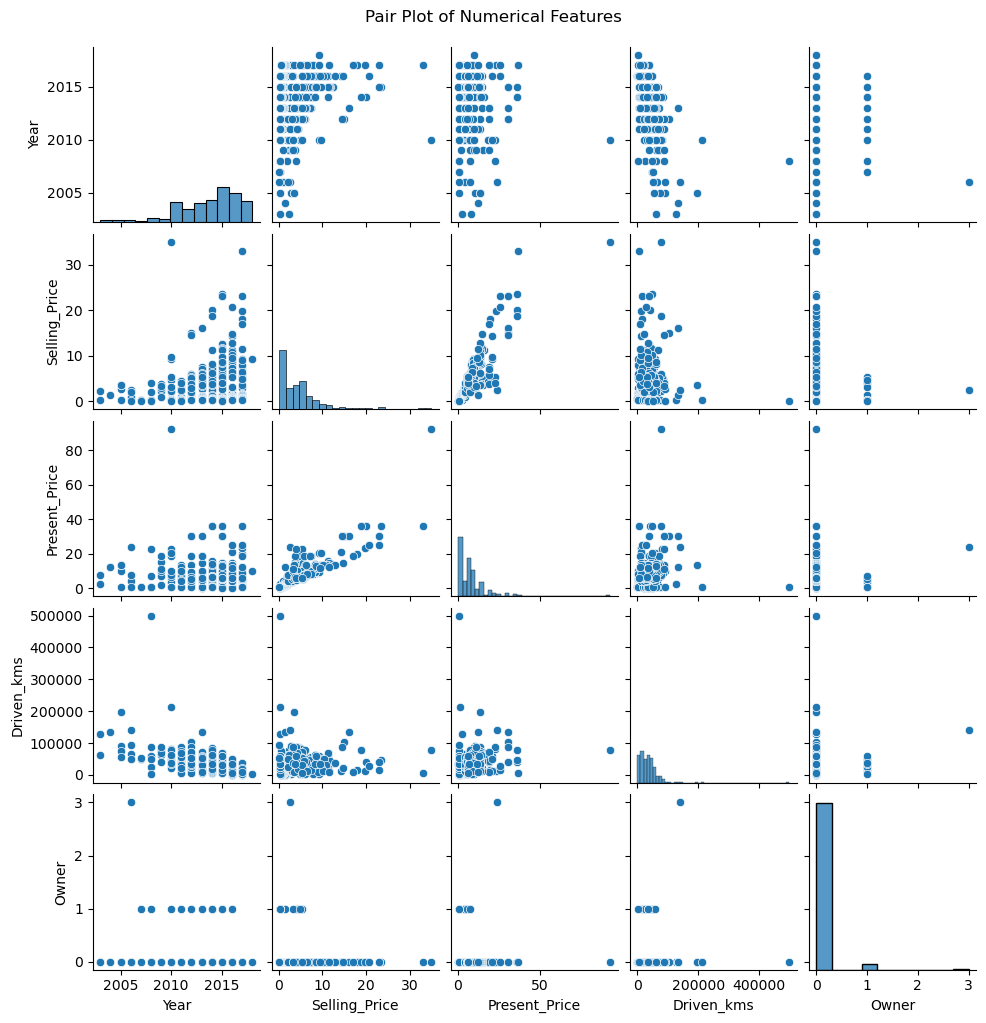

In [82]:
sb.pairplot(data, height=2)                                      #Pair Plots
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()


### Boxplot

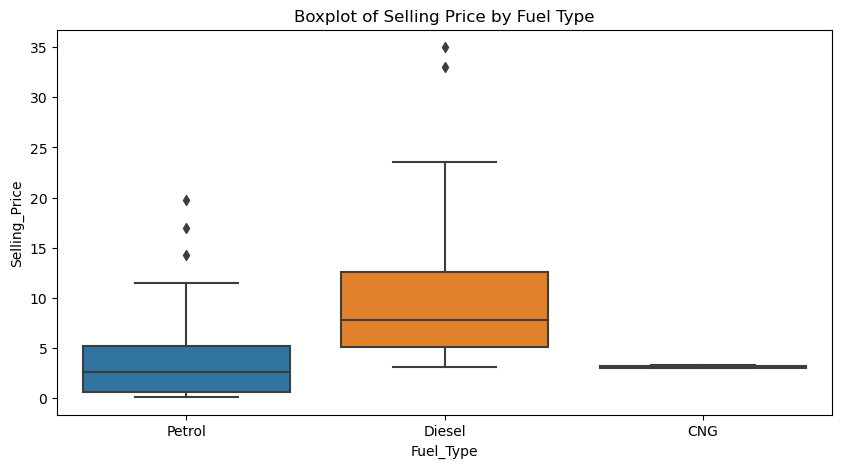

In [83]:
plt.figure(figsize=(10, 5))                                    #Box Plots for Fuel Type
sb.boxplot(x='Fuel_Type', y='Selling_Price', data=data)
plt.title('Boxplot of Selling Price by Fuel Type')
plt.show()


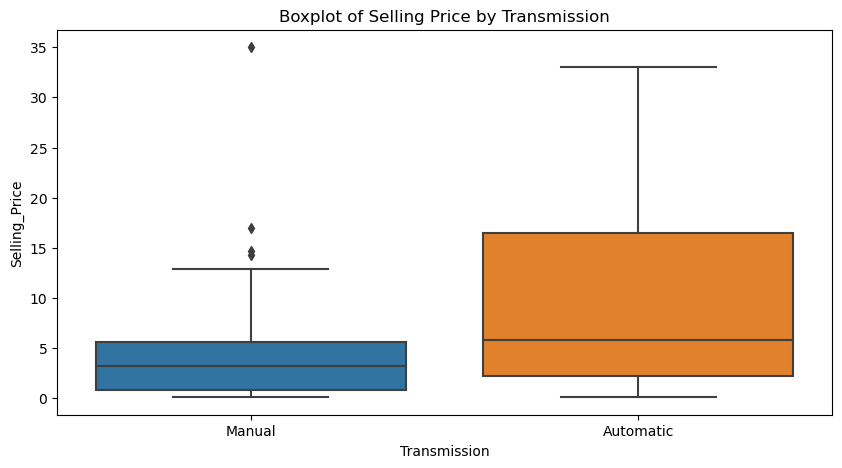

In [84]:
plt.figure(figsize=(10, 5))                                #Box plots for Transmission Type
sb.boxplot(x='Transmission', y='Selling_Price', data=data)
plt.title('Boxplot of Selling Price by Transmission')
plt.show()

### Countplot

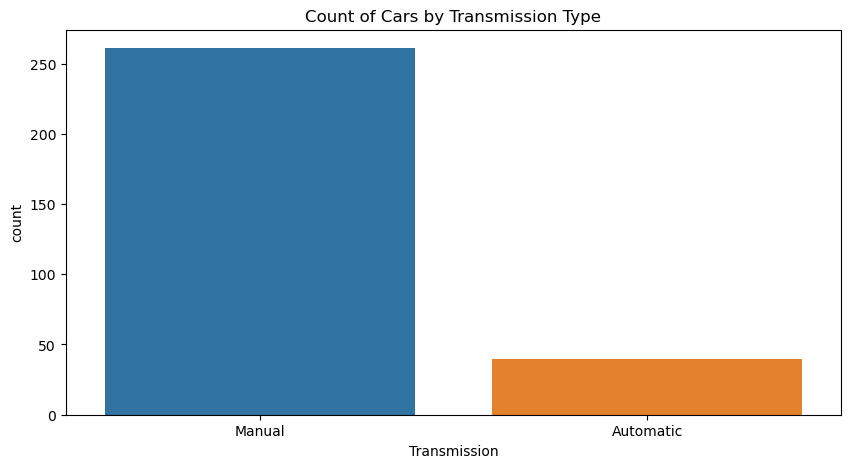

In [85]:
plt.figure(figsize=(10, 5))                                 #Count Plots for Transmission Type
sb.countplot(x='Transmission', data=data)
plt.title('Count of Cars by Transmission Type')
plt.show()


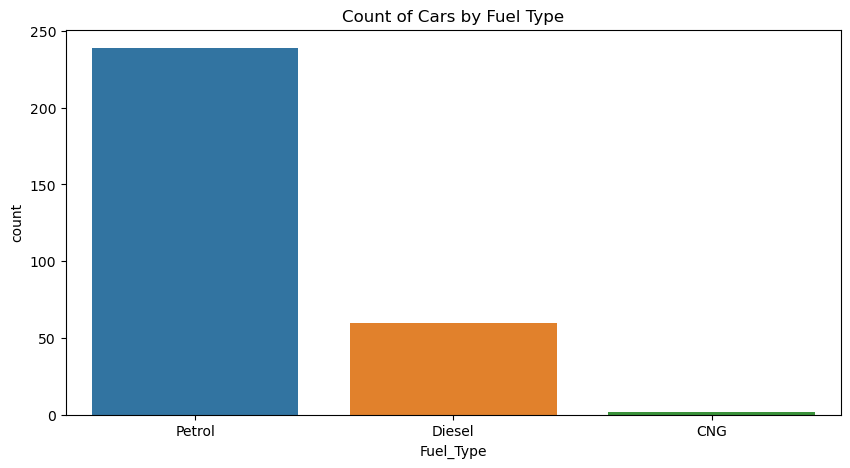

In [86]:
plt.figure(figsize=(10, 5))                            #Count Type for Fuel Type
sb.countplot(x='Fuel_Type', data=data)
plt.title('Count of Cars by Fuel Type')
plt.show()

### Scatterplot

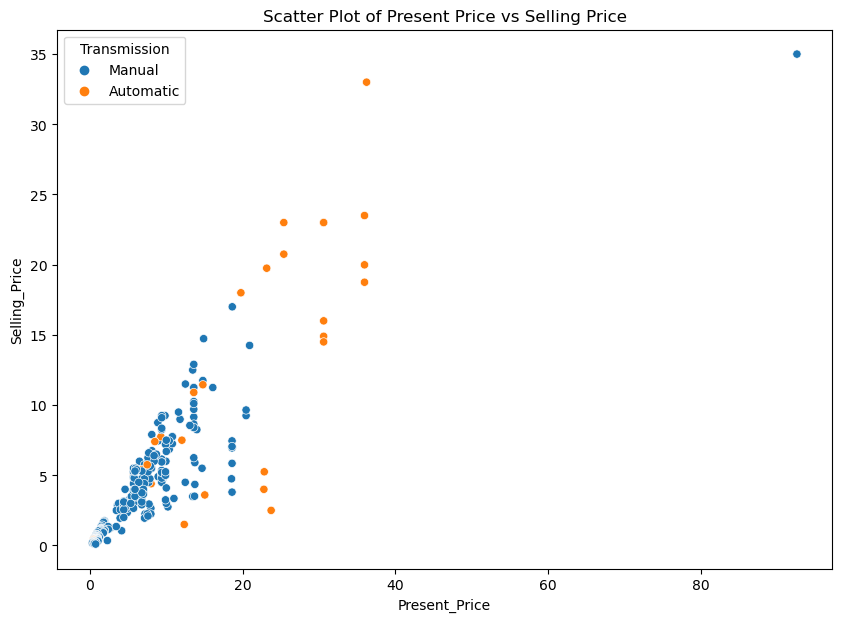

In [87]:
plt.figure(figsize=(10, 7))                              #Scatter Plots         
sb.scatterplot(x='Present_Price', y='Selling_Price', hue='Transmission', data=data)
plt.title('Scatter Plot of Present Price vs Selling Price')
plt.show()


### Training and Testing

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [89]:
x = data.drop(['Car_Name', 'Selling_Price', 'Present_Price'], axis=1)
y = data['Selling_Price']

In [90]:
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission']    #Defining Categories
one_hot = OneHotEncoder()

In [91]:
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder='passthrough')

In [92]:
regressor = RandomForestRegressor(n_estimators=100, random_state=42)            #Creating Pipeline for Prediction
pipeline = Pipeline([('transformer', transformer), ('regressor', regressor)])

### Split x and y 

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)  # x and y

In [94]:
pipeline.fit(x_train, y_train)                                       #Pipeline model


y_pred = pipeline.predict(x_test)                                    #Prediction model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



In [95]:
mse, r2                                                              #Display Commands

(3.9939363335324196, 0.8266188413836656)

### Car Predictions

In [96]:
y_pred = pipeline.predict(x_test)                                   #Predictions

In [97]:
import plotly.express as px

In [98]:
scatter_data = pd.DataFrame({'Actual Prices': y_test, 'Predicted Prices': y_pred})

fig = px.scatter(scatter_data, x='Actual Prices', y='Predicted Prices', title='Actual vs Predicted Selling Prices')
fig.add_trace(px.line(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()]).data[0])  # Add the red line

fig.update_layout(
    xaxis_title='Actual Prices',
    yaxis_title='Predicted Prices',
    hovermode='closest',
    showlegend=False
)

fig.show()

In [ ]:
year = int(input("Enter the car's manufacturing year: "))
Driven_kms = int(input("Enter the total kilometers driven by the car: "))
fuel_type = input("Enter the fuel type (Petrol/Diesel/CNG): ")
selling_type = input("Enter the selling type (Individual/Dealer): ")
transmission = input("Enter the transmission type (Manual/Automatic): ")
owner = int(input("Enter the number of previous owners: "))

input_data = pd.DataFrame({                     # Create a DataFrame with user input
    'Year': [year],
    'Driven_kms': [Driven_kms],
    'Fuel_Type': [fuel_type],
    'Selling_type': [selling_type],
    'Transmission': [transmission],
    'Owner': [owner]
})

predicted_price = pipeline.predict(input_data)  # Make predictions using the trained model


print(f'\nPredicted Car Price: ₹{predicted_price[0]:,.2f}Lakhs')


## Conclusion: 

Car price prediction stands as a testament to the power of machine learning in deciphering intricate patterns within vast datasets. By exploring the interplay between brand reputation, features, horsepower, and mileage, this project has provided a glimpse into the complexity of factors influencing car prices. The journey through building and training a predictive model has underscored the significance of data-driven decision-making in the automotive industry. As we conclude, it's evident that the fusion of domain knowledge, data preprocessing, and machine learning algorithms can unlock valuable insights, enabling us to make informed predictions about car prices. This project not only serves as a foundational exploration into car price prediction but also paves the way for further advancements in understanding and forecasting market trends in the automotive sector.